# **Which lifestyle patterns have the strongest impact on health?**



## **1. Data Acquisition** 

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [68]:
csv_file = "../data/Wellbeing_and_lifestyle_data_Kaggle.csv"
csv_data = pd.read_csv(csv_file)

# Display the first few rows of the dataframe to understand its structure
csv_data.head()


,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


## **Data Preparation/Data Cleaning** 


### **Filtering the dataset**

In [69]:
csv_data = pd.read_csv(csv_file)  # Replace with your actual file name

# List of columns to keep
columns_to_keep = [
    "Timestamp",
    "FRUITS_VEGGIES",
    "DAILY_STRESS",
    "PLACES_VISITED",
    "CORE_CIRCLE",
    "BMI_RANGE",
    "DAILY_STEPS",
    "SLEEP_HOURS",
    "SUFFICIENT_INCOME",
    "TIME_FOR_PASSION",
    "WEEKLY_MEDITATION",
    "AGE",
    "GENDER",
]

filtered_csv_data = csv_data[columns_to_keep]

# Save to new CSV (Only one time)
#filtered_csv_data.to_csv("../data/Filtered_Wellbeing_and_lifestyle_data_Kaggle.csv", index=False)
#csv_data=filtered_csv_data


### **Missing Values:** 

In [84]:
print("\nMissing values check: \n")
missing_val = csv_data.isnull().sum()
if missing_val.sum()== 0:
    print("no missing values found")
else:
    print("name of the column and the number of values missing:")
    print(missing_val[missing_val>0])


Missing values check: 

no missing values found


### **Different Format:**
 

In [85]:

print("\nData formatting check per column: ")
issue=False
for column in csv_data.columns:
        if csv_data[column].apply(type).nunique()>1:
            print(f"Mixed data types in column '{column}'")
            issue = True
            
if not issue:
        print("no issues with formatting")


Data formatting check per column: 
no issues with formatting


### **Check: Case sensitive**
**Note:** There are no case sensitive errors in the whole dataset.


#### Check Unique values & data types

In [86]:
print(csv_data["GENDER"].unique())

valid_values = ["Male", "Female"]
invalid_entries = csv_data[~csv_data["GENDER"].isin(valid_values)]
print("Case-sensitive invalid entries:")
print(invalid_entries["GENDER"].head())

print(filtered_csv_data[columns_to_keep].dtypes)

['Female' 'Male']
Case-sensitive invalid entries:
Series([], Name: GENDER, dtype: object)
Timestamp            object
FRUITS_VEGGIES        int64
DAILY_STRESS         object
PLACES_VISITED        int64
CORE_CIRCLE           int64
BMI_RANGE             int64
DAILY_STEPS           int64
SLEEP_HOURS           int64
SUFFICIENT_INCOME     int64
TIME_FOR_PASSION      int64
WEEKLY_MEDITATION     int64
AGE                  object
GENDER               object
dtype: object


### **Outliers:**
**Note:** The IQR factor is set as a factor of 1.5


Outliers in 'FRUITS_VEGGIES':
Empty DataFrame
Columns: [FRUITS_VEGGIES]
Index: []

Outliers in 'PLACES_VISITED':
Empty DataFrame
Columns: [PLACES_VISITED]
Index: []

Outliers in 'CORE_CIRCLE':
Empty DataFrame
Columns: [CORE_CIRCLE]
Index: []

Outliers in 'DAILY_STEPS':
Empty DataFrame
Columns: [DAILY_STEPS]
Index: []

Outliers in 'SLEEP_HOURS':
       SLEEP_HOURS
738              2
1904             1
2572             2
2968             1
2986             1
3007             1
3023             1
3376             1
3436             1
3437             1
3611             2
3785             1
4380             2
4763             1
5712             2
5867             1
6299             1
6751             2
6795             2
8394             2
8924             1
8967             1
9318             2
9338             1
9415             2
9637             2
9929             2
9930             2
9944             2
9987             1
10083            2
10975            2
12955            1
13081 

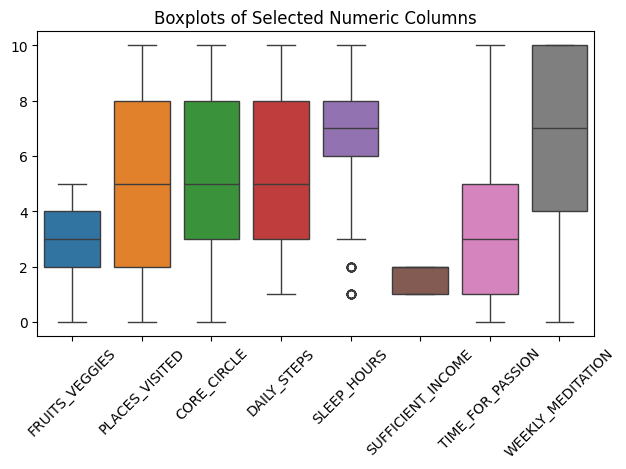

In [87]:

# Columns for outlier detection (only numeric)
columns = [
    "FRUITS_VEGGIES",
    "PLACES_VISITED",
    "CORE_CIRCLE",
    "DAILY_STEPS",
    "SLEEP_HOURS",
    "SUFFICIENT_INCOME",
    "TIME_FOR_PASSION",
    "WEEKLY_MEDITATION",
]

# Make a copy to clean outliers if needed
clean_data = csv_data.copy()

for col in columns:
    Q1 = csv_data[col].quantile(0.25)
    Q3 = csv_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = csv_data[(filtered_csv_data[col] < lower_bound) | (csv_data[col] > upper_bound)]

    print(f"\nOutliers in '{col}':")
    print(outliers[[col]])

    # Optionally remove outliers
    # clean_data = clean_data[(clean_data[col] >= lower_bound) & (clean_data[col] <= upper_bound)]

# Boxplots for visualizing all columns at once
sns.boxplot(data=csv_data[columns])
plt.title("Boxplots of Selected Numeric Columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Explorative Analysis

### Univariate Analysis

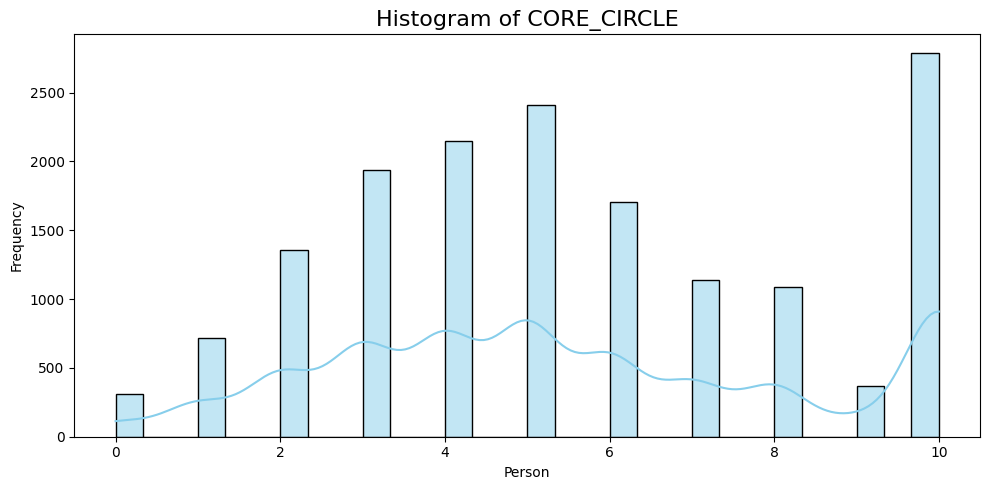

In [88]:
feature = 'CORE_CIRCLE'

plt.figure(figsize=(10, 5))
sns.histplot(csv_data[feature], bins=30, kde=True, color='skyblue')

plt.title(f'Histogram of {feature}', fontsize=16)
plt.xlabel('Person')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

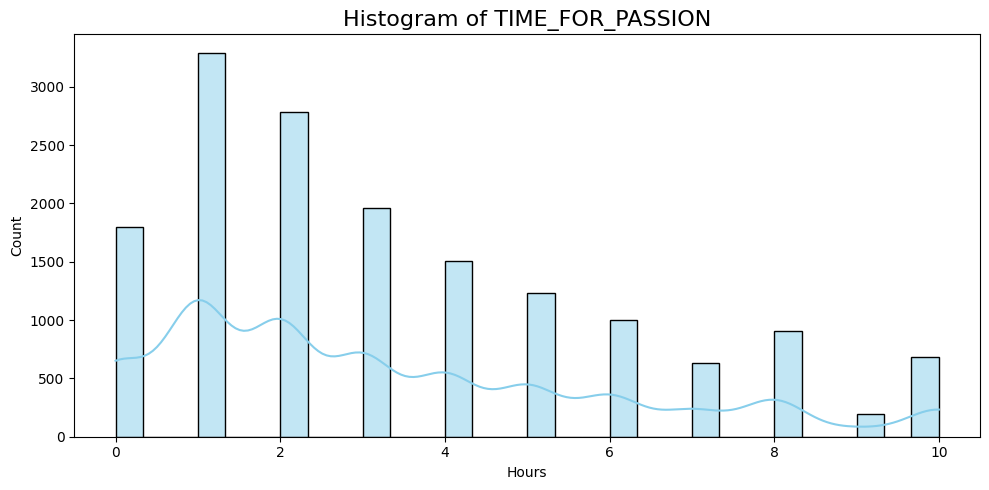

In [89]:
feature = 'TIME_FOR_PASSION'

plt.figure(figsize=(10, 5))
sns.histplot(csv_data[feature], bins=30, kde=True, color='skyblue')

plt.title(f'Histogram of {feature}', fontsize=16)
plt.xlabel('Hours')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

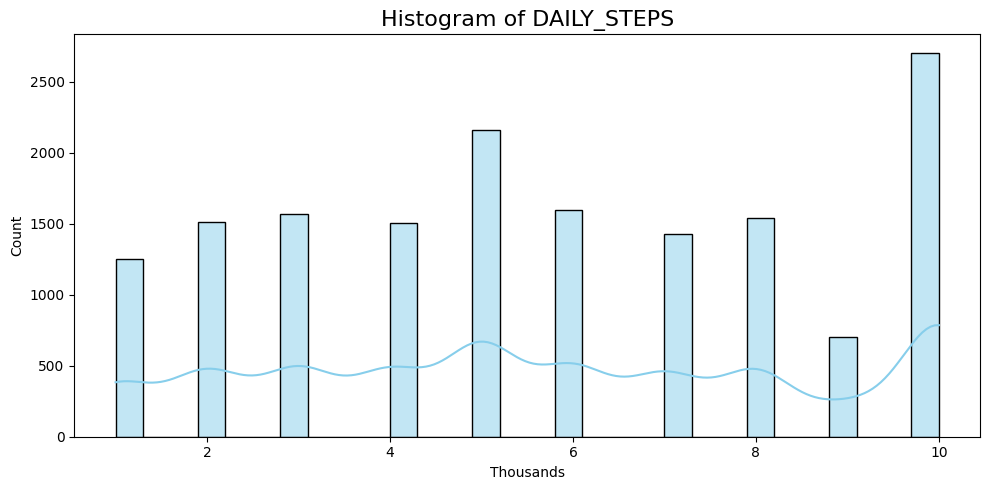

In [90]:
feature = 'DAILY_STEPS'

plt.figure(figsize=(10, 5))
sns.histplot(csv_data[feature], bins=30, kde=True, color='skyblue')

plt.title(f'Histogram of {feature}', fontsize=16)
plt.xlabel('Thousands')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

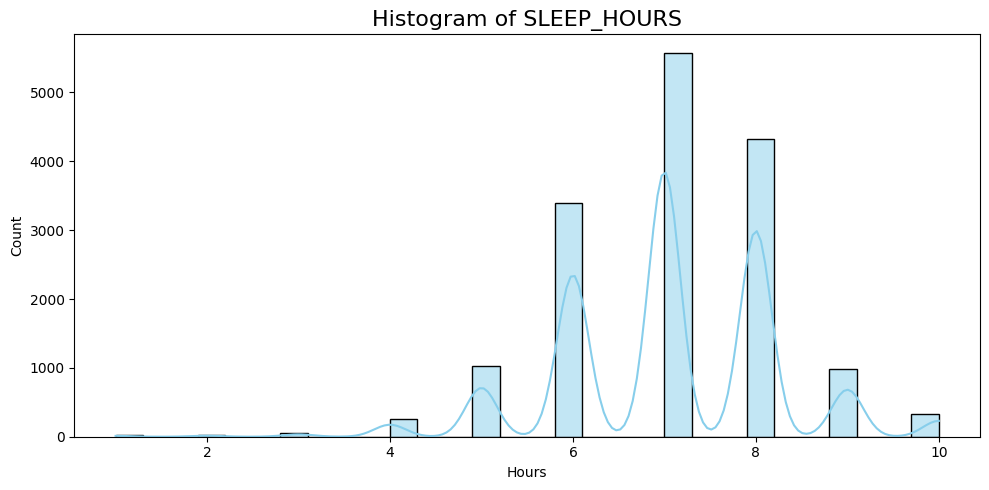

In [91]:
feature = 'SLEEP_HOURS'

plt.figure(figsize=(10, 5))
sns.histplot(csv_data[feature], bins=30, kde=True, color='skyblue')

plt.title(f'Histogram of {feature}', fontsize=16)
plt.xlabel('Hours')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Bivariate Analysis

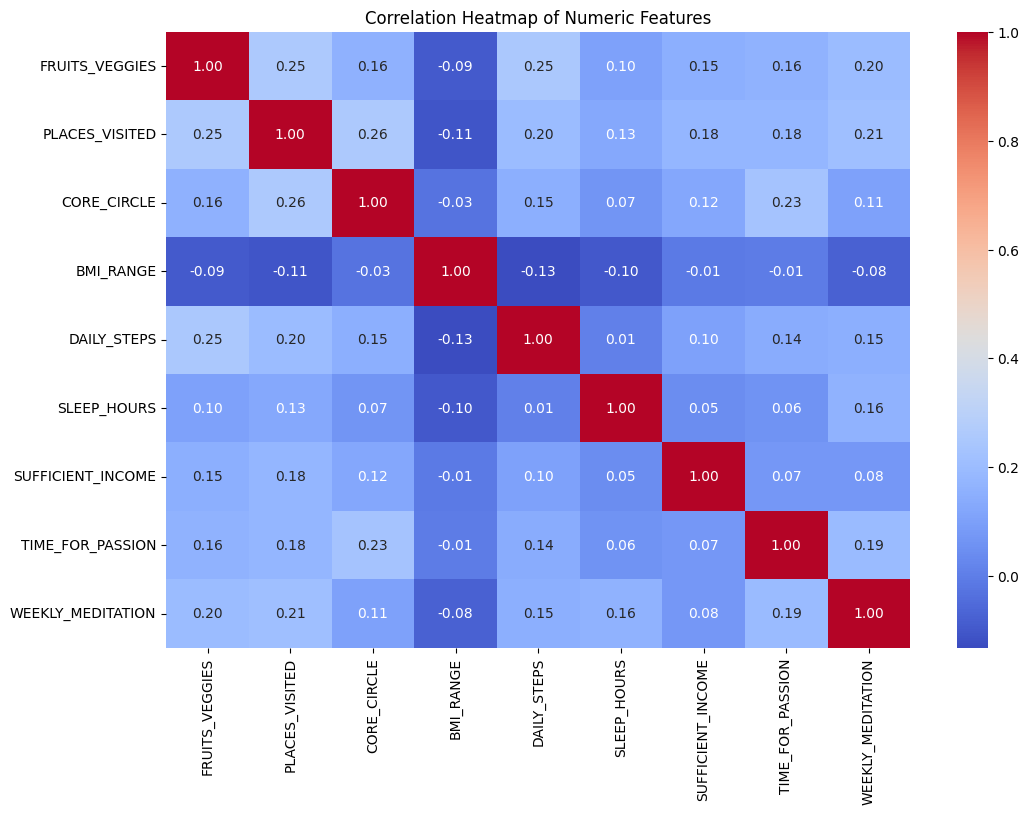

In [92]:
numeric_cols = ['FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE', 'BMI_RANGE',
                'DAILY_STEPS', 'SLEEP_HOURS', 'SUFFICIENT_INCOME',
                'TIME_FOR_PASSION', 'WEEKLY_MEDITATION']

plt.figure(figsize=(12, 8))
sns.heatmap(csv_data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

/var/folders/q1/ps6dvt7554v7pgn7kjwj79wr0000gn/T/ipykernel_35172/15194317.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=csv_data, x=lifestyle_factor, y='DAILY_STRESS', palette='viridis')


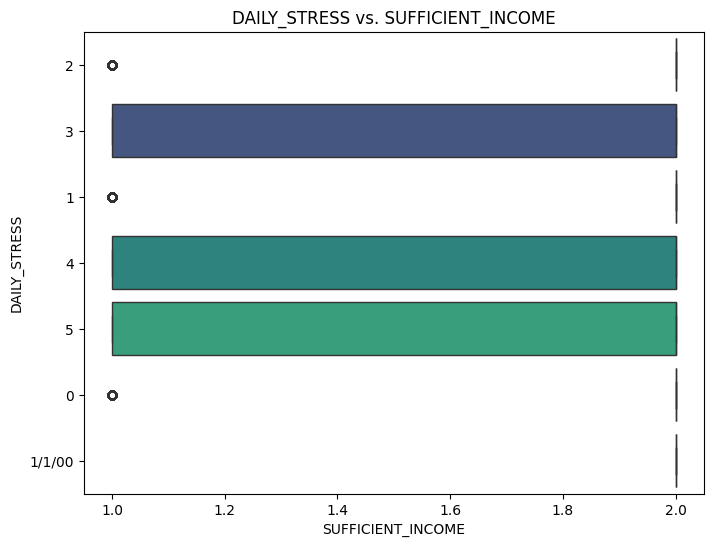

/var/folders/q1/ps6dvt7554v7pgn7kjwj79wr0000gn/T/ipykernel_35172/15194317.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=csv_data, x=lifestyle_factor, y='DAILY_STRESS', palette='viridis')


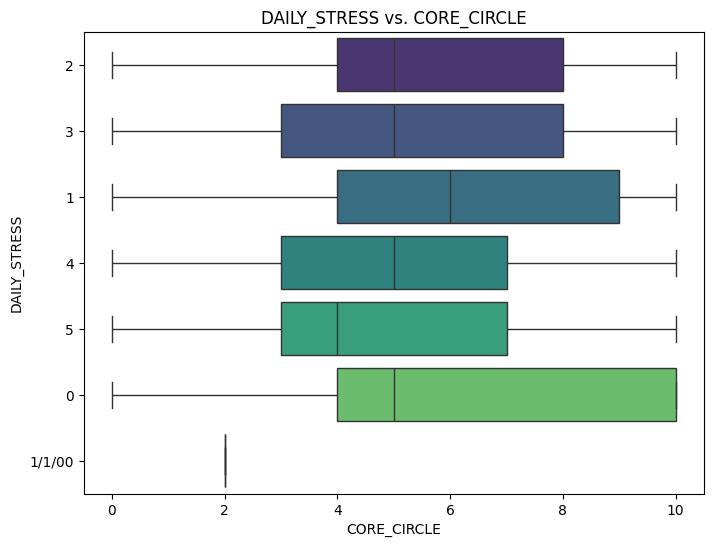

In [93]:
# Box plots: DAILY_STRESS vs. Lifestyle factors
for lifestyle_factor in ['SUFFICIENT_INCOME', 'CORE_CIRCLE']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=csv_data, x=lifestyle_factor, y='DAILY_STRESS', palette='viridis')
    plt.title(f'DAILY_STRESS vs. {lifestyle_factor}')
    plt.xlabel(lifestyle_factor)
    plt.ylabel('DAILY_STRESS')
    plt.show()

### Categorical Data Analysis

/var/folders/q1/ps6dvt7554v7pgn7kjwj79wr0000gn/T/ipykernel_35172/123710911.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=csv_data, x='GENDER', y='FRUITS_VEGGIES', palette='Set1')


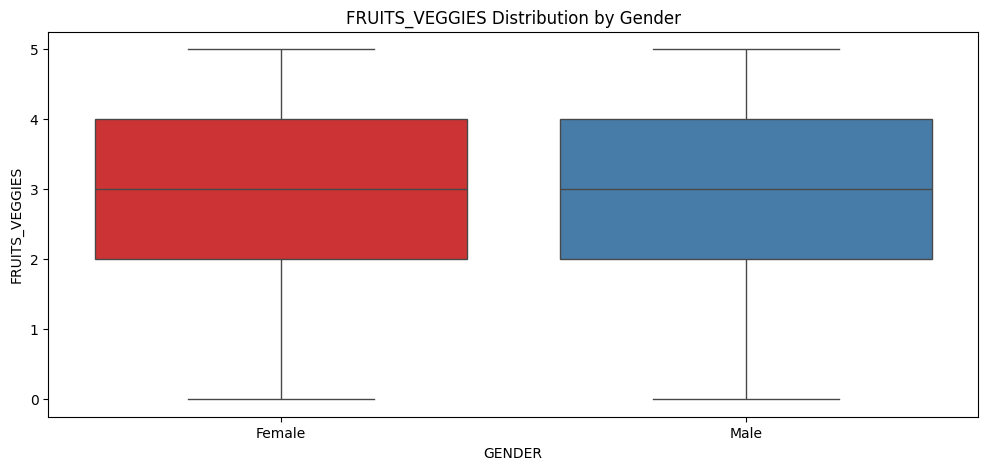

/var/folders/q1/ps6dvt7554v7pgn7kjwj79wr0000gn/T/ipykernel_35172/123710911.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=csv_data, x='AGE', y='FRUITS_VEGGIES', palette='Set2')


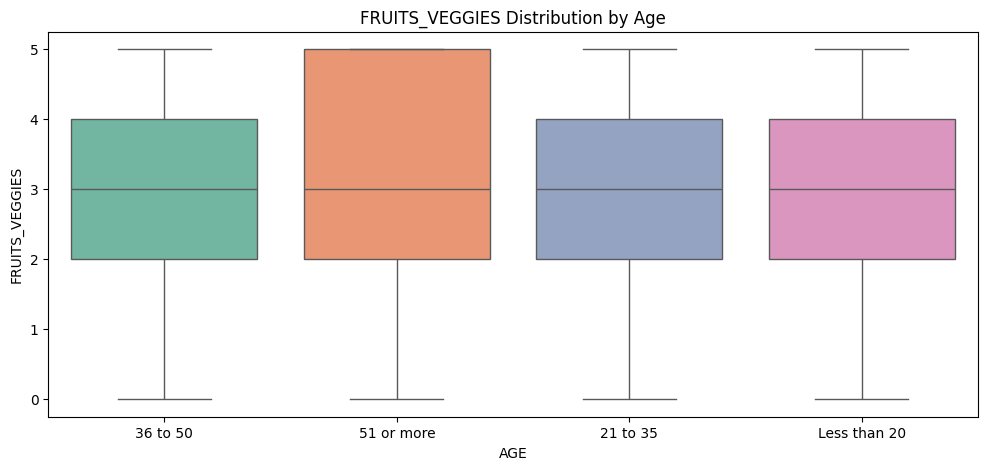

In [94]:
# Box plots for FRUITS_VEGGIES by gender and age
plt.figure(figsize=(12, 5))
sns.boxplot(data=csv_data, x='GENDER', y='FRUITS_VEGGIES', palette='Set1')
plt.title('FRUITS_VEGGIES Distribution by Gender')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=csv_data, x='AGE', y='FRUITS_VEGGIES', palette='Set2')
plt.title('FRUITS_VEGGIES Distribution by Age')
plt.show()


/var/folders/q1/ps6dvt7554v7pgn7kjwj79wr0000gn/T/ipykernel_35172/1678866156.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=csv_data, x='GENDER', y='DAILY_STEPS', palette='Set1')


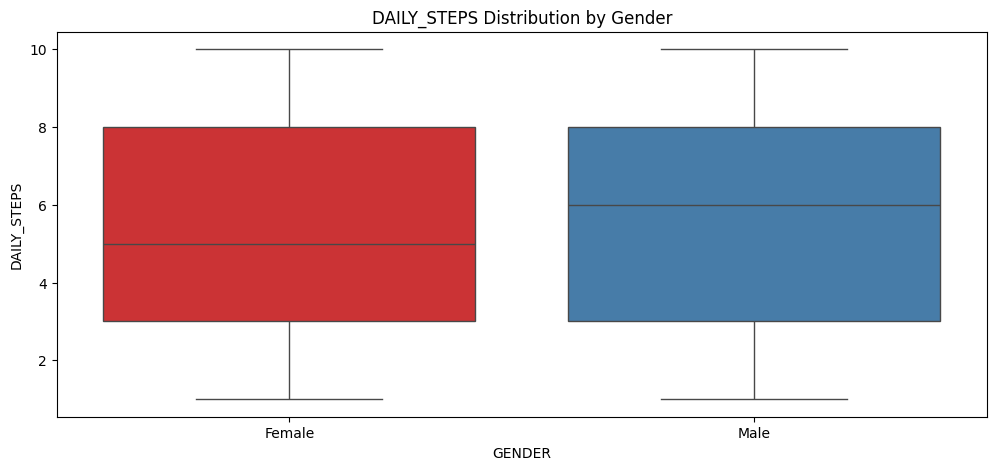

/var/folders/q1/ps6dvt7554v7pgn7kjwj79wr0000gn/T/ipykernel_35172/1678866156.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=csv_data, x='AGE', y='DAILY_STEPS', palette='Set2')


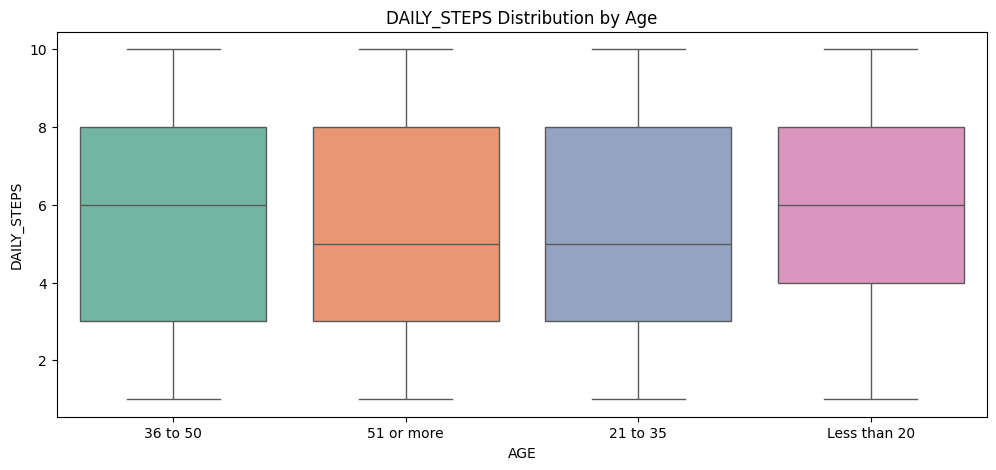

In [95]:
# Box plots for DAILY_STEPS by gender and age
plt.figure(figsize=(12, 5))
sns.boxplot(data=csv_data, x='GENDER', y='DAILY_STEPS', palette='Set1')
plt.title('DAILY_STEPS Distribution by Gender')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=csv_data, x='AGE', y='DAILY_STEPS', palette='Set2')
plt.title('DAILY_STEPS Distribution by Age')
plt.show()

/var/folders/q1/ps6dvt7554v7pgn7kjwj79wr0000gn/T/ipykernel_35172/180057165.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=csv_data, x='GENDER', y='SLEEP_HOURS', palette='Set1')


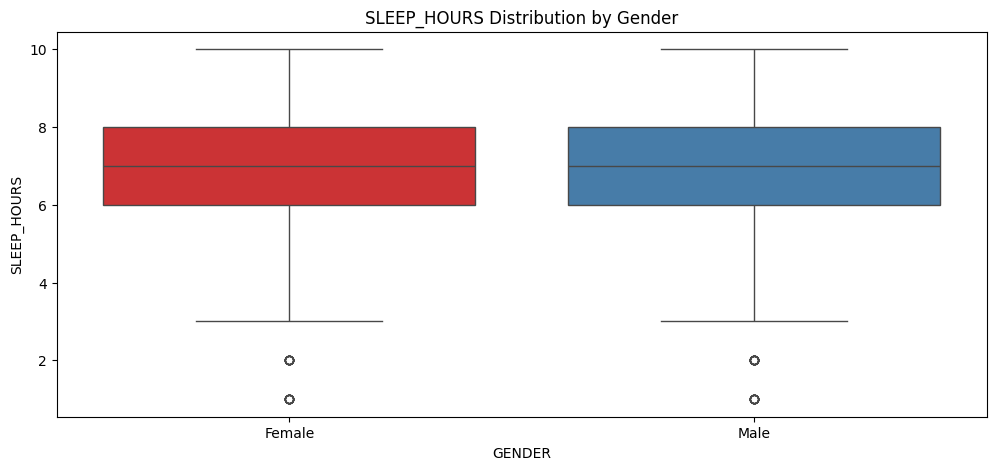

/var/folders/q1/ps6dvt7554v7pgn7kjwj79wr0000gn/T/ipykernel_35172/180057165.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=csv_data, x='AGE', y='SLEEP_HOURS', palette='Set2')


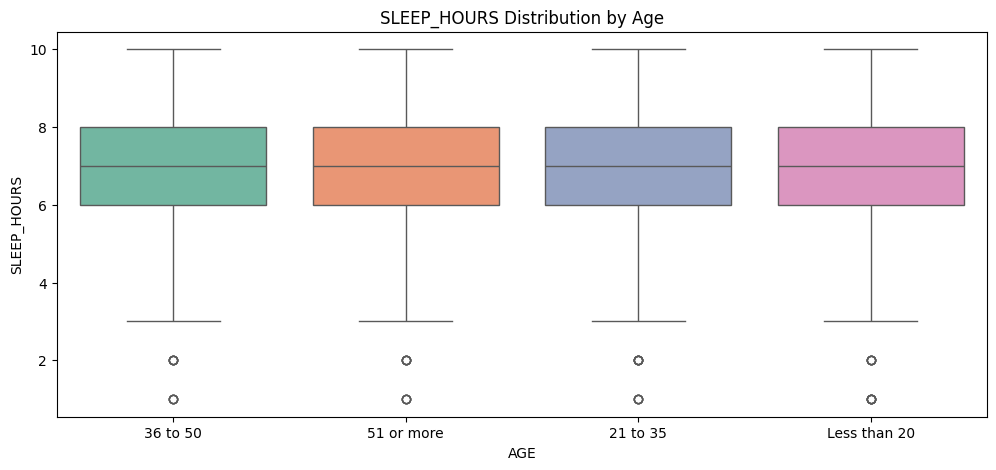

In [96]:
# Box plots for SLEEP_HOURS by gender and age
plt.figure(figsize=(12, 5))
sns.boxplot(data=csv_data, x='GENDER', y='SLEEP_HOURS', palette='Set1')
plt.title('SLEEP_HOURS Distribution by Gender')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=csv_data, x='AGE', y='SLEEP_HOURS', palette='Set2')
plt.title('SLEEP_HOURS Distribution by Age')
plt.show()


/var/folders/q1/ps6dvt7554v7pgn7kjwj79wr0000gn/T/ipykernel_35172/952051092.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=csv_data, x='AGE', palette='pastel')


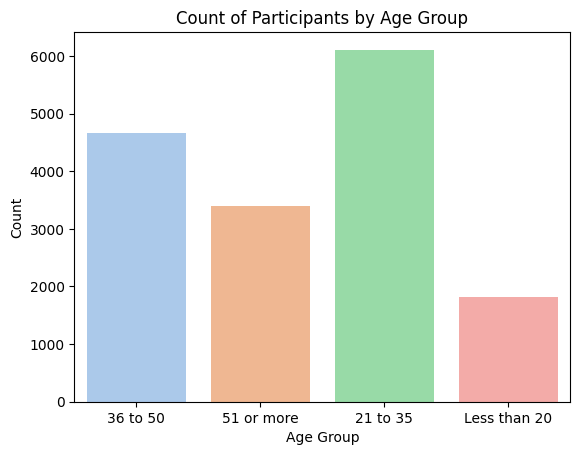

In [97]:
sns.countplot(data=csv_data, x='AGE', palette='pastel')
plt.title('Count of Participants by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


/var/folders/q1/ps6dvt7554v7pgn7kjwj79wr0000gn/T/ipykernel_35172/2624071233.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=csv_data, x='GENDER', palette='muted')


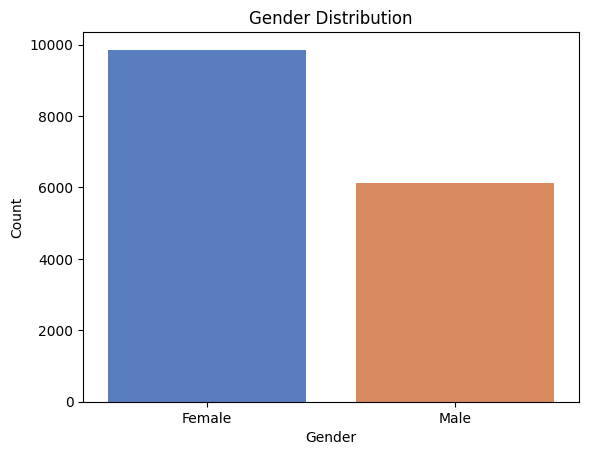

In [98]:

sns.countplot(data=csv_data, x='GENDER', palette='muted')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


### **Feature Engineering** 

#### **Normalization and Feature construction**

In [70]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = [
    "FRUITS_VEGGIES",        # 0–5
    "DAILY_STRESS",          # 0–5
    "PLACES_VISITED",        # 0–10
    "CORE_CIRCLE",           # 0–10
    "BMI_RANGE",             # 1 or 2 (kategorisch)
    "DAILY_STEPS",           # 1–10
    "SLEEP_HOURS",           # 1–10
    "SUFFICIENT_INCOME",     # 1 or 2 (kategorisch)
    "TIME_FOR_PASSION",      # 0–10
    "WEEKLY_MEDITATION"     # 0–10
    #"WORK_LIFE_BALANCE_SCORE"  # 480–820
]


# BMI_SCORE: 1 = healthy, 2 = overweight
csv_data["BMI_SCORE"] = csv_data["BMI_RANGE"].apply(lambda x: 1 if x == 1 else 0)

# INCOME_SCORE: 1= not enough 2 = enough 
csv_data["INCOME_SCORE"] = csv_data["SUFFICIENT_INCOME"].apply(lambda x: 1 if x == 2 else 0)


# columns to normalize without BMI and income
columns_to_scale = [
    "FRUITS_VEGGIES",
    "DAILY_STRESS",
    "PLACES_VISITED",
    "CORE_CIRCLE",
    "DAILY_STEPS",
    "SLEEP_HOURS",
    "TIME_FOR_PASSION",
    "WEEKLY_MEDITATION"
    #"WORK_LIFE_BALANCE_SCORE"
]

#Normalization
numeric_df = csv_data[columns_to_scale].apply(pd.to_numeric, errors="coerce")
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(numeric_df)
scaled_df = pd.DataFrame(scaled_values, columns=columns_to_scale)

# inverting stress(less stress = better)
scaled_df["DAILY_STRESS"] = 1 - scaled_df["DAILY_STRESS"]

# add BMI and income to scaled_df
scaled_df["BMI_SCORE"] = csv_data["BMI_SCORE"]
scaled_df["INCOME_SCORE"] = csv_data["INCOME_SCORE"]

# new column: health
health_columns = [
    "BMI_SCORE"
]
csv_data["health"] = scaled_df[health_columns].mean(axis=1)

# new column: lifestyle
lifestyle_columns = [
    "FRUITS_VEGGIES",
    "DAILY_STRESS",
    "DAILY_STEPS",
    "SLEEP_HOURS",
    "PLACES_VISITED",
    "CORE_CIRCLE",
    "TIME_FOR_PASSION",
    "WEEKLY_MEDITATION",
    #"WORK_LIFE_BALANCE_SCORE",
    "INCOME_SCORE"
]
csv_data["lifestyle"] = scaled_df[lifestyle_columns].mean(axis=1)

print(csv_data[["health", "lifestyle", "BMI_SCORE", "INCOME_SCORE"]].head())





   health  lifestyle  BMI_SCORE  INCOME_SCORE
0     1.0   0.390123          1             0
1     0.0   0.502469          0             1
2     0.0   0.523457          0             1
3     0.0   0.376543          0             0
4     0.0   0.567901          0             1


#### **Correlation**

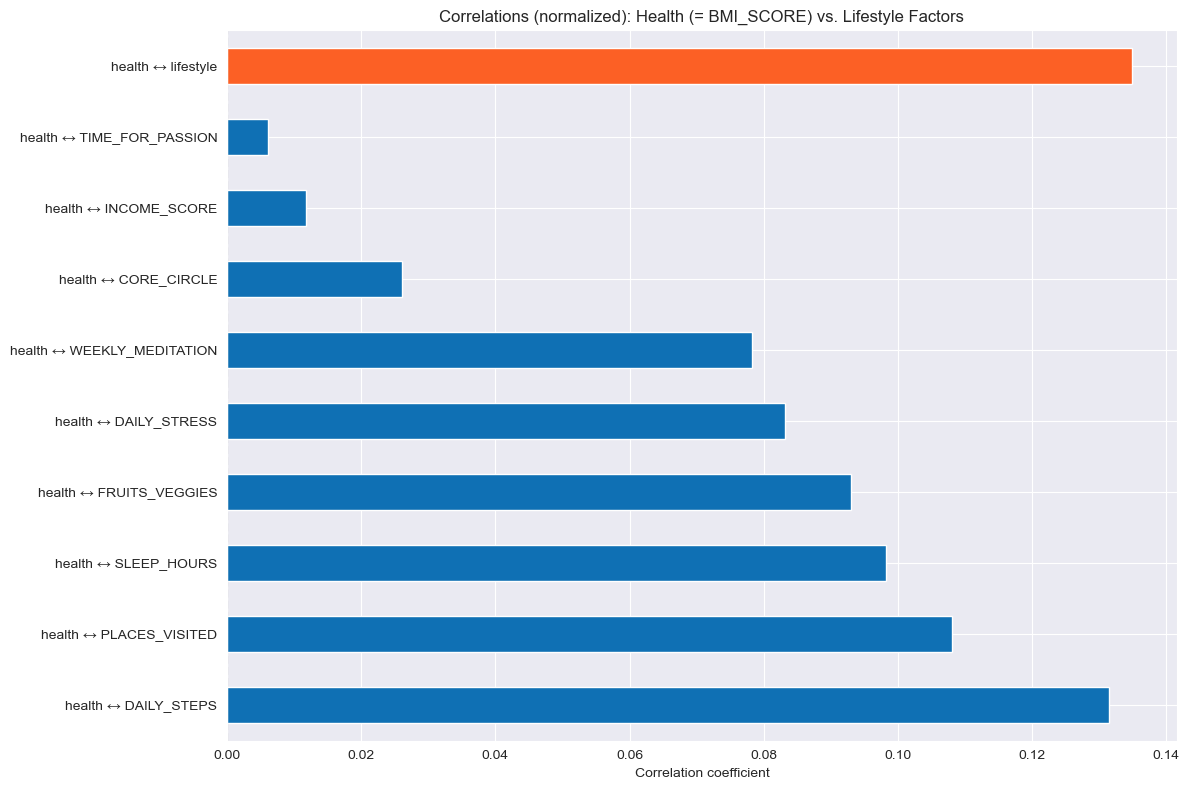

In [71]:
# add health and lifestyle to the scaled_df
scaled_df["health"] = csv_data["health"]
scaled_df["lifestyle"] = csv_data["lifestyle"]


lifestyle_subcategories = [
    "FRUITS_VEGGIES",
    "DAILY_STRESS",
    "DAILY_STEPS",
    "SLEEP_HOURS",
    "PLACES_VISITED",
    "CORE_CIRCLE",
    "TIME_FOR_PASSION",
    "WEEKLY_MEDITATION",
    # "WORK_LIFE_BALANCE_SCORE",  
    "INCOME_SCORE"
]

# Korrelation: jede Lifestyle-Komponente mit Health
corr_health_to_lifestyle = {
    f"health ↔ {col}": scaled_df["health"].corr(scaled_df[col])
    for col in lifestyle_subcategories
}

# Gesamtkorrelation Health ↔ Lifestyle
general_corr = {
    "health ↔ lifestyle": scaled_df["health"].corr(scaled_df["lifestyle"])
}

# Sortieren
sorted_health_to_lifestyle = dict(
    sorted(corr_health_to_lifestyle.items(), key=lambda x: x[1])
)
# in die richtige Reihenfolge bringen (zuerst allgemeine Korrelation und danach die anderen)
final_corrs = {**general_corr, **sorted_health_to_lifestyle}

# Farben: Orange für Hauptkorrelation, Grün für Subkategorien
colors = ["#fc6025"] + ["#0f70b4"] * (len(final_corrs) - 1)

# Plot
corr_series = pd.Series(final_corrs)

plt.figure(figsize=(12, 8))
corr_series.plot(kind="barh", color=colors)

plt.title("Correlations (normalized): Health (= BMI_SCORE) vs. Lifestyle Factors")
plt.xlabel("Correlation coefficient")
plt.axvline(0, color="gray", linestyle="--")
plt.gca().invert_yaxis()  # so that health ↔ lifestyle is at the top
plt.tight_layout()
plt.show()


### **Colour palette**
The most used ones: 
1. orange: "#fc6025"
2. brown: "#46361d"
3. green: "#60af2f"
4. blue: "#0f70b4"
 
Orange
1. "#fc6025"
2. "#fc6023" 
3. "#fb6125" 

Green
1. "#60af2f" 
2. "#a6df81" 
3. "#5fb02f" 

Blue
1. "#92e4f0" 
2. "#0f70b4"
3. "#91e5f0" 
4. "#edffff" 


### **Clustering**

In [52]:

import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # number of logical cores
from sklearn.cluster import KMeans

# Step 1: Select the features for clustering
X = scaled_df[["health", "lifestyle"]]

# Step 2: Apply KMeans
k = 3  # You can experiment with different values
kmeans = KMeans(n_clusters=k, random_state=42)
csv_data["cluster"] = kmeans.fit_predict(X)

# Step 3: Visualize the clusters
plt.figure(figsize=(8, 6))
colors = ['#fc6025', '#60af2f', '#0f70b4']
for i in range(k):
    cluster_data = csv_data[csv_data["cluster"] == i]
    plt.scatter(cluster_data["health"], cluster_data["lifestyle"], 
                color=colors[i], label=f"Cluster {i}", alpha=0.6)

plt.xlabel("Health Score")
plt.ylabel("Lifestyle Score")
plt.title("K-Means Clustering of Participants")
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Print the cluster centers for final check
print("\nCluster centers (Health, Lifestyle):")
for i, center in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i}: Health = {center[0]:.2f}, Lifestyle = {center[1]:.2f}")

C:\Users\Alina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: Length of values (15972) does not match length of index (15971)

### **Confirming with Elbow method**

C:\Users\Alina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Alina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Alina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Alina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Alina\anaconda3\Lib\site-packages\sklearn\clust

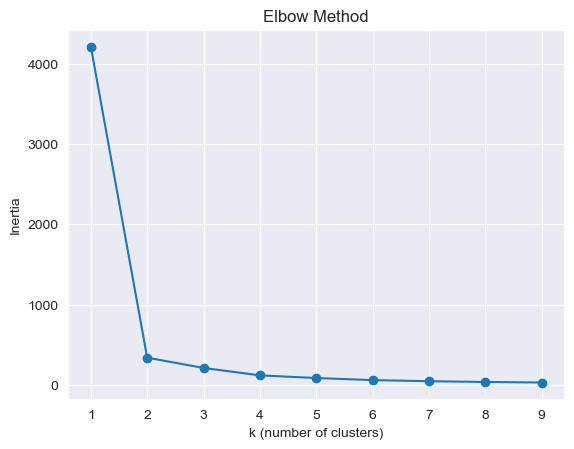

In [58]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 10)
for k in K:
    model = KMeans(n_clusters=k, random_state=0).fit(scaled_df[["health", "lifestyle"]])
    inertia.append(model.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("k (number of clusters)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

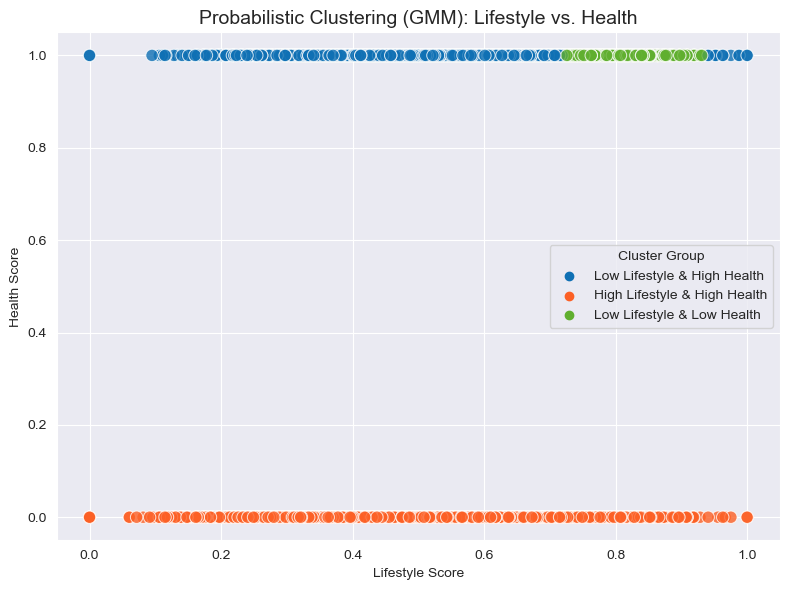

In [53]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# STEP 1: Select normalized features
X = scaled_df[['health', 'lifestyle']].dropna()

# STEP 2: Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 3: Apply GMM clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)
cluster_labels = gmm.predict(X_scaled)

# STEP 4: Assign cluster labels to DataFrame
scaled_df['cluster'] = np.nan
scaled_df.loc[X.index, 'cluster'] = cluster_labels
scaled_df['cluster'] = scaled_df['cluster'].astype('Int64')

# STEP 5: Name the clusters based on means
cluster_names = {
    0: "Low Lifestyle & Low Health",
    1: "High Lifestyle & High Health",
    2: "Low Lifestyle & High Health"
}
scaled_df["cluster_label"] = scaled_df["cluster"].map(cluster_names)

# STEP 6: Custom color palette
custom_palette = {
    "Low Lifestyle & Low Health": "#60af2f",   # green
    "High Lifestyle & High Health": "#fc6025", # orange
    "Low Lifestyle & High Health": "#0f70b4"   # blue
}

# STEP 7: Final plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=scaled_df,
    x='lifestyle',
    y='health',
    hue='cluster_label',
    palette=custom_palette,
    s=80,
    alpha=0.8
)
plt.title("Probabilistic Clustering (GMM): Lifestyle vs. Health", fontsize=14)
plt.xlabel("Lifestyle Score")
plt.ylabel("Health Score")
plt.legend(title='Cluster Group')
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Hierarchical Clustering**

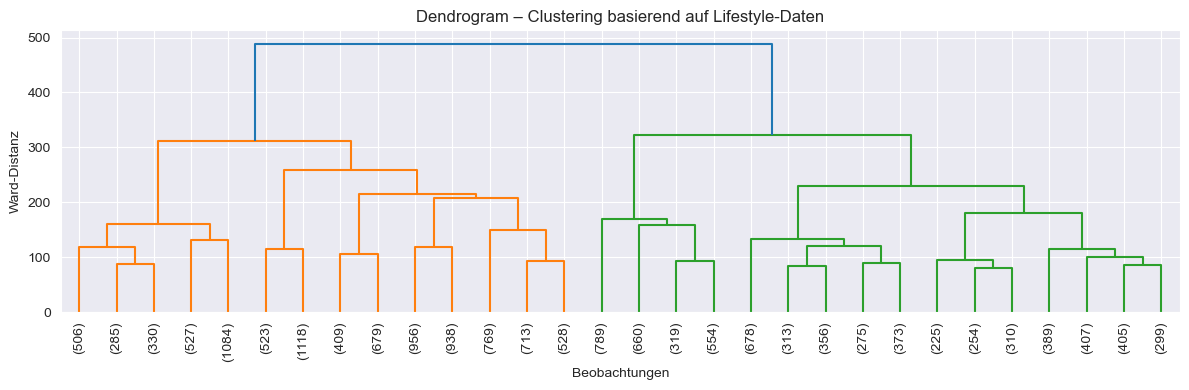

Beste Clusteranzahl laut Silhouette Score: 2


In [72]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

lifestyle_subcategories = [
    "FRUITS_VEGGIES",
    "DAILY_STRESS",
    "DAILY_STEPS",
    "SLEEP_HOURS",
    "PLACES_VISITED",
    "CORE_CIRCLE",
    "TIME_FOR_PASSION",
    "WEEKLY_MEDITATION",
    "INCOME_SCORE"
]
# 1. Lifestyle-Spalten in numerisch konvertieren (nicht-konvertierbare werden NaN)
for col in lifestyle_subcategories:
    csv_data[col] = pd.to_numeric(csv_data[col], errors='coerce')

# 2. Zeilen löschen, die in den Lifestyle-Spalten NaN enthalten
csv_data = csv_data.dropna(subset=lifestyle_subcategories)


# 3. Ausgewählte Lifestyle-Daten extrahieren (ohne NaNs) für Clustering
X_df = csv_data[lifestyle_subcategories].copy()

# 4. Finales NumPy-Array für Clustering
X = X_df.values

# Hierarchisches Clustering
Z = linkage(X, method="ward", metric="euclidean")

# Dendrogramm anzeigen
plt.figure(figsize=(12, 4))
dendrogram(Z, truncate_mode="lastp", p=30, leaf_rotation=90)
plt.title("Dendrogram – Clustering basierend auf Lifestyle-Daten")
plt.xlabel("Beobachtungen")
plt.ylabel("Ward-Distanz")
plt.tight_layout()
plt.show()

# Optimale Clusteranzahl mit Silhouette Score bestimmen
sil_scores = {}
for k in range(2, 11):
    labels = fcluster(Z, k, criterion="maxclust")
    sil_scores[k] = silhouette_score(X, labels)

best_k = max(sil_scores, key=sil_scores.get)
print(f"Beste Clusteranzahl laut Silhouette Score: {best_k}")

# Clusterlabels erzeugen
cluster_labels = fcluster(Z, best_k, criterion="maxclust")

# Neue Spalte in csv_data – Clusterlabels zu den bereinigten Zeilen hinzufügen
csv_data["cluster"] = cluster_labels


In [73]:
print("Automatically chosen cluster number:", best_k)

# calculate averages per cluster
cluster_health = (
    csv_data.groupby("cluster")["health"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# show ranking
print("🏆 Cluster-Ranking according to average health:\n")
print(cluster_health)

cluster_health["Rank"] = cluster_health["health"].rank(ascending=False).astype(int)
print(cluster_health.sort_values("Rank"))

Automatically chosen cluster number: 2
🏆 Cluster-Ranking according to average health:

   cluster    health
0        2  0.637148
1        1  0.555686
   cluster    health  Rank
0        2  0.637148     1
1        1  0.555686     2


In [74]:
# Difference between healthiest and unhealthiest cluster
max_health = cluster_health["health"].max()
min_health = cluster_health["health"].min()
delta = max_health - min_health

print(f" Difference between healthiest and unhealthiest cluster: {delta:.3f}")

best_cluster = cluster_health.iloc[0]
worst_cluster = cluster_health.iloc[-1]

print(f" Healthiest cluster: {int(best_cluster['cluster'])} mit health = {best_cluster['health']:.3f}")
print(f" Unhealthiest cluster: {int(worst_cluster['cluster'])} mit health = {worst_cluster['health']:.3f}")
print(f" Difference: {delta:.3f}")

 Difference between healthiest and unhealthiest cluster: 0.081
 Healthiest cluster: 2 mit health = 0.637
 Unhealthiest cluster: 1 mit health = 0.556
 Difference: 0.081


### **Classification** 

#### **SVM**

In [75]:

from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler

lifestyle_subcategories = [
    "FRUITS_VEGGIES",
    "DAILY_STRESS",
    "DAILY_STEPS",
    "SLEEP_HOURS",
    "PLACES_VISITED",
    "CORE_CIRCLE",
    "TIME_FOR_PASSION",
    "WEEKLY_MEDITATION",
    # "WORK_LIFE_BALANCE_SCORE",  
    "INCOME_SCORE"
]

# 3. Features (X) und Zielvariable (y) definieren
X = csv_data[lifestyle_subcategories]
y = csv_data["health"]

# 4. Scoring-Metriken
scoring = ["accuracy", "precision", "recall", "f1"]

# 5. DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")
dummy_results = cross_validate(dummy, X, y, cv=5, scoring=scoring)

print("DummyClassifier:")
for metric in scoring:
    mean_score = dummy_results[f'test_{metric}'].mean()
    print(f"{metric.capitalize():<10}: {mean_score:.3f}")

# 6. Pipeline mit SVM
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", random_state=42))
])

svm_results = cross_validate(svm_pipeline, X, y, cv=5, scoring=scoring)

print(" SVM Classifier:")
for metric in scoring:
    mean_score = svm_results[f'test_{metric}'].mean()
    print(f"{metric.capitalize():<10}: {mean_score:.3f}")


DummyClassifier:
Accuracy  : 0.589
Precision : 0.589
Recall    : 1.000
F1        : 0.742
 SVM Classifier:
Accuracy  : 0.607
Precision : 0.616
Recall    : 0.881
F1        : 0.725
